In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from scipy import stats

%matplotlib inline

In [5]:
#demographic
demo = '/Users/df_final_demo.txt'
demo_df = pd.read_csv(demo)
demo_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [6]:
demo_df['gendr'].value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

<Axes: xlabel='clnt_age', ylabel='Count'>

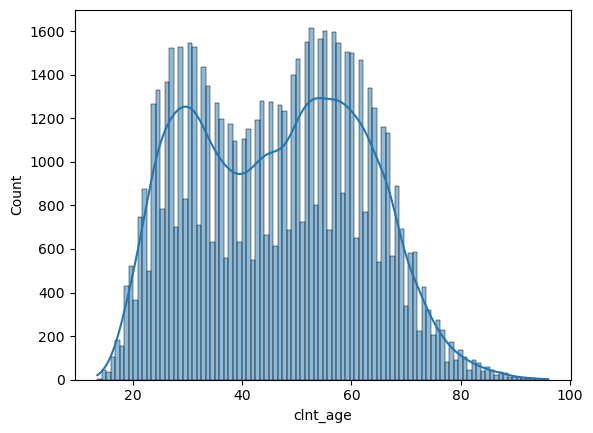

In [7]:
sns.histplot(demo_df['clnt_age'], kde=True, bins=100)

In [8]:
#final group who was in the experiment
final_exp = '/Users/df_final_experiment_clients.txt'
final_df = pd.read_csv(final_exp)
final_df

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [9]:
clients_merged = pd.merge(demo_df, final_df, on='client_id', how='outer')
clients_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [10]:
test_group = clients_merged[clients_merged['Variation'] == 'Test']
test_group

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,Test
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0,Test
...,...,...,...,...,...,...,...,...,...,...
50492,501496,23.0,281.0,35.0,F,2.0,32529.34,0.0,3.0,Test
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


<Axes: xlabel='clnt_age', ylabel='Count'>

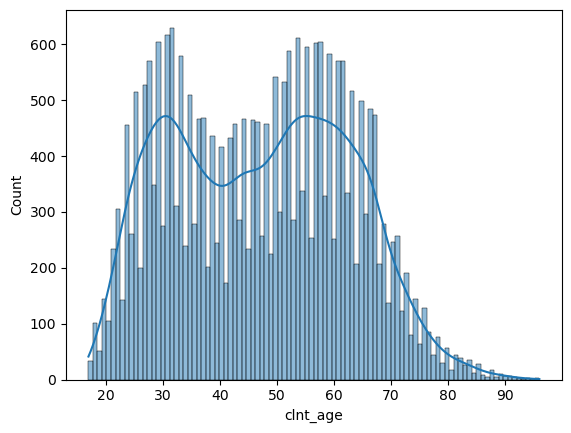

In [11]:
sns.histplot(test_group['clnt_age'], kde=True, bins=100)

<Axes: xlabel='clnt_tenure_mnth', ylabel='Count'>

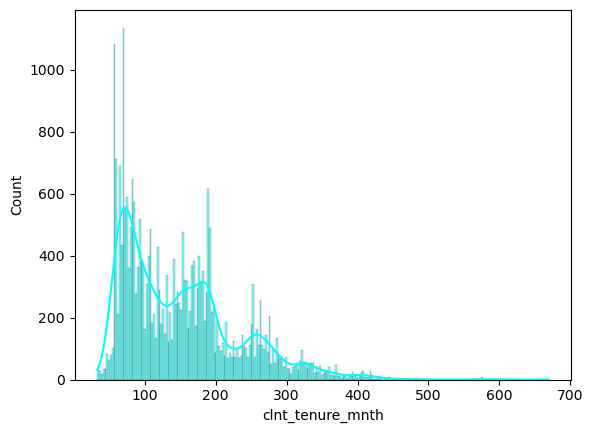

In [12]:
sns.histplot(test_group['clnt_tenure_mnth'], kde=True, bins=250, color="cyan") 

In [13]:
control_group = clients_merged[clients_merged['Variation'] == 'Control']
control_group

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0,Control
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0,Control
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0,Control
...,...,...,...,...,...,...,...,...,...,...
50486,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0,Control
50491,2787512,23.0,283.0,48.0,F,3.0,123618.60,1.0,4.0,Control
50493,9932367,23.0,280.0,57.0,F,2.0,94466.55,6.0,9.0,Control
50494,4079649,23.0,276.0,62.5,M,3.0,57575.28,4.0,7.0,Control


<Axes: xlabel='clnt_tenure_mnth', ylabel='Count'>

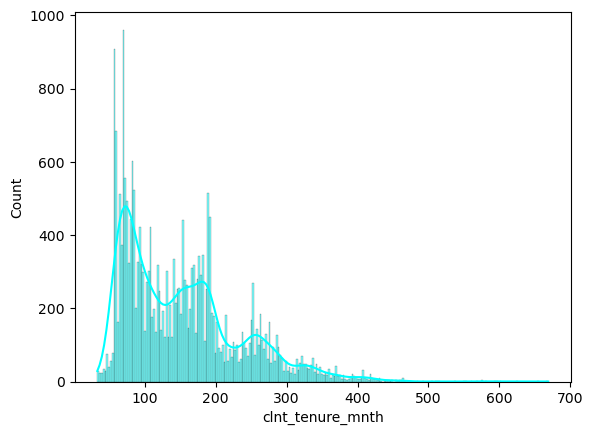

In [14]:
sns.histplot(control_group['clnt_tenure_mnth'], kde=True, bins=250, color="cyan") 

<Axes: xlabel='clnt_age', ylabel='Count'>

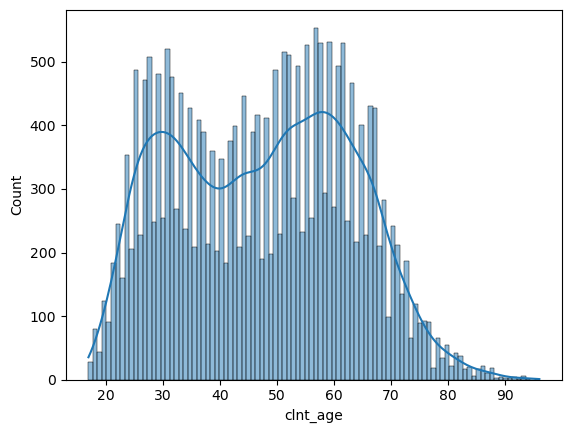

In [15]:
sns.histplot(control_group['clnt_age'], kde=True, bins=100)

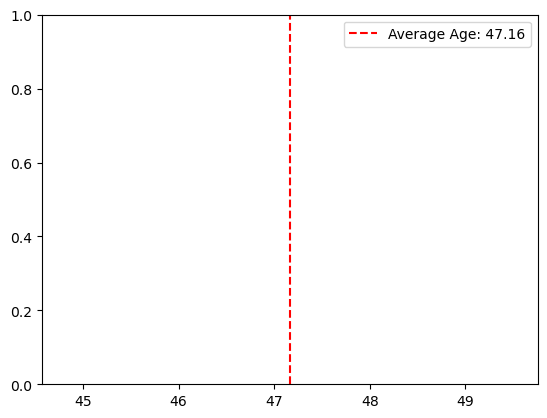

In [16]:
average_age = test_group['clnt_age'].mean()

plt.axvline(x=average_age, color='red', linestyle='--', label='Average Age: {:.2f}'.format(average_age))

plt.legend()
plt.show()

<Axes: xlabel='clnt_tenure_mnth', ylabel='Count'>

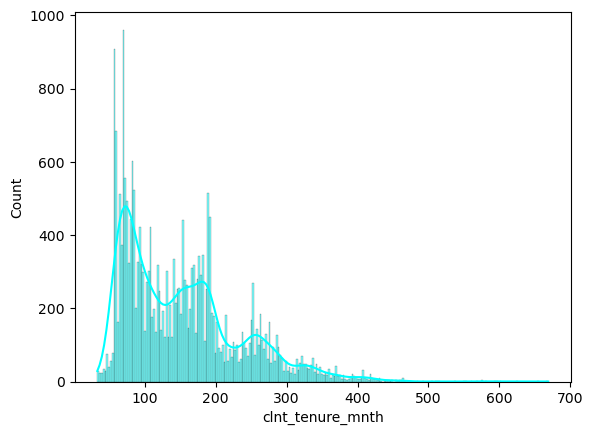

In [17]:
sns.histplot(control_group['clnt_tenure_mnth'], kde=True, bins=250, color="cyan") 

In [18]:
pt1 = '/Users/df_final_web_data_pt_1.txt'
p1_df = pd.read_csv(pt1)
pt2 = '/Users/df_final_web_data_pt_2.txt'
p2_df = pd.read_csv(pt2)

In [19]:
merge_pt = pd.concat([p1_df, p2_df], axis=0)
merge_pt

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [20]:
merge_pt['process_step'].value_counts()

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64

In [21]:
merge_pt['date_time'] = pd.to_datetime(merge_pt['date_time'])

earliest_date = merge_pt['date_time'].min()
latest_date = merge_pt['date_time'].max()

print(f"Earliest date: {earliest_date}")
print(f"Latest date: {latest_date}")

start_date = pd.Timestamp('2017-03-15 00:00:00')
end_date = pd.Timestamp('2017-06-20 23:59:59')

if earliest_date >= start_date and latest_date <= end_date:
    print("All dates are within the specified range.")
else:
    print("Dates are outside the specified range.")

Earliest date: 2017-03-15 00:03:03
Latest date: 2017-06-20 23:59:57
All dates are within the specified range.


In [22]:
grouped = merge_pt.groupby('client_id')
grouped

In [23]:
completion_times = grouped.apply(lambda x: x[x['process_step'] == 'confirm']['date_time'].max() - x[x['process_step'] == 'start']['date_time'].min())

In [24]:
test_comp = pd.merge(test_group, completion_times.rename('completion_time'), how='left', left_on='client_id', right_index=True)
test_comp = test_comp.dropna(subset=['completion_time'])
#test_comp.drop_duplicates(keep='first', inplace=True)
test_comp.duplicated().any()

False

In [25]:
test_comp['completion_time'] = test_comp['completion_time'].astype(str)
test_comp[['completion_days', 'additional_hours']] = test_comp['completion_time'].str.extract(r'(\d+)\s+days\s+(\d{2}:\d{2}:\d{2})')
#test_comp['completion_days'] = test_comp['completion_days'].astype(int)
test_comp['additional_hours'] = test_comp['additional_hours']

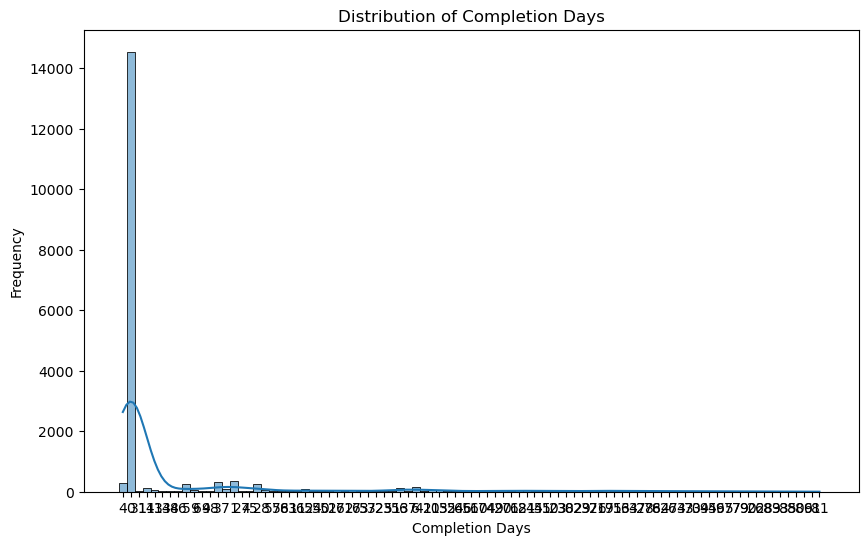

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(test_comp['completion_days'], bins=30, kde=True)
plt.title('Distribution of Completion Days')
plt.xlabel('Completion Days')
plt.ylabel('Frequency')
plt.show()

In [27]:
control_comp = pd.merge(control_group, completion_times.rename('completion_time'), how='left', left_on='client_id', right_index=True)
control_comp = control_comp.dropna(subset=['completion_time'])
#control_comp.drop_duplicates(keep='first', inplace=True)
control_comp.duplicated().any()

False

In [28]:
t_start= pd.merge(pd.merge(test_group, merge_pt[merge_pt['process_step']=='start'], on='client_id'), 
                     completion_times.rename('completion_time'), 
                     how='left', 
                     left_on='client_id', 
                     right_index=True)
t_start.drop(columns = ['date_time','visitor_id','visit_id'], inplace=True)
t_start.drop_duplicates(keep='first', inplace=True)

c_start= pd.merge(pd.merge(control_group, merge_pt[merge_pt['process_step']=='start'], on='client_id'), 
                     completion_times.rename('completion_time'), 
                     how='left', 
                     left_on='client_id', 
                     right_index=True)
c_start.drop(columns = ['date_time','visitor_id','visit_id'], inplace=True)
c_start.drop_duplicates(keep='first', inplace=True)

In [29]:
c_confirm = pd.merge(pd.merge(control_group, merge_pt[merge_pt['process_step']=='confirm'], on='client_id'), 
                     completion_times.rename('completion_time'), 
                     how='left', 
                     left_on='client_id', 
                     right_index=True)
c_confirm.drop(columns = ['date_time','visitor_id','visit_id'], inplace=True)
c_confirm.drop_duplicates(keep='first', inplace=True)

t_confirm= pd.merge(pd.merge(test_group, merge_pt[merge_pt['process_step']=='confirm'], on='client_id'), 
                     completion_times.rename('completion_time'), 
                     how='left', 
                     left_on='client_id', 
                     right_index=True)
t_confirm.drop(columns = ['date_time','visitor_id','visit_id'], inplace=True)
t_confirm.drop_duplicates(keep='first', inplace=True)

In [30]:
keep_columns = ['client_id', 'process_step', 'clnt_age', 'clnt_tenure_mnth', 'calls_6_mnth']
t_start = t_start[keep_columns]
t_confirm = t_confirm[keep_columns]
c_start = c_start[keep_columns]
c_confirm = c_confirm[keep_columns]

### KPI Creation

In [31]:
m = merge_pt.copy()
m

test_m = pd.merge(m, final_df, on='client_id', how='outer')
test_m

w_age = pd.merge(test_m, demo_df[['client_id', 'clnt_age']], on='client_id', how='outer')
w_age

w_age = w_age.dropna(subset='Variation')
w_age

w_age['date_time'] = pd.to_datetime(w_age['date_time'])

In [32]:
grouped = w_age.groupby('Variation')

def calculate_error_rate(group):
    error_count = (group['process_step'] != group['process_step'].shift(-1)).sum()
    return error_count / len(group)

error_rates = grouped.apply(calculate_error_rate)

def calculate_completion_rate(group):
    unique_confirm = group.drop_duplicates(subset=['client_id', 'process_step'])
    confirm_count = (unique_confirm['process_step'] == 'confirm').sum()
    completion_rate = confirm_count / len(unique_confirm['client_id'].unique())
    return completion_rate

completion_rates = grouped.apply(calculate_completion_rate)

def calculate_avg_time_spent(group):
    return group.groupby(['Variation', 'process_step'])['date_time'].diff().mean()

avg_time_spent = w_age.groupby(['Variation', 'process_step']).apply(calculate_avg_time_spent)
avg_time_spent = avg_time_spent.apply(lambda x: pd.Timedelta(seconds=round(x.total_seconds())))

result_df = pd.concat([error_rates.rename('Error Rate'), completion_rates.rename('Completion Rate'), avg_time_spent.rename('Avg Time Spent')], axis=1)

result_df

,Error Rate,Completion Rate,Avg Time Spent
Control,0.815742,0.655873,NaT
Test,0.822808,0.692932,NaT
"(Control, confirm)",NaN,NaN,0 days 00:03:08
"(Control, start)",NaN,NaN,0 days 00:01:04
"(Control, step_1)",NaN,NaN,0 days 00:01:43
"(Control, step_2)",NaN,NaN,0 days 00:01:58
"(Control, step_3)",NaN,NaN,0 days 00:02:25
"(Test, confirm)",NaN,NaN,0 days 00:01:46
"(Test, start)",NaN,NaN,0 days 00:00:30
"(Test, step_1)",NaN,NaN,0 days 00:00:43


In [33]:
reshaped_df = pd.DataFrame()

reshaped_df['Error Rate'] = [0.815742, 0.822808] 
reshaped_df['Completion Rate'] = [0.655873, 0.692932]  
reshaped_df['Avg_Start'] = ['01:04', '00:30'] 
reshaped_df['Avg_Step1'] = ['01:43', '00:43']  
reshaped_df['Avg_Step2'] = ['01:58', '00:54'] 
reshaped_df['Avg_Step3'] = ['02:25', '01:05'] 
reshaped_df['Avg_Confirm'] = ['03:08', '01:46'] 

reshaped_df.index = ['Control', 'Test']

reshaped_df

,Error Rate,Completion Rate,Avg_Start,Avg_Step1,Avg_Step2,Avg_Step3,Avg_Confirm
Control,0.815742,0.655873,01:04,01:43,01:58,02:25,03:08
Test,0.822808,0.692932,00:30,00:43,00:54,01:05,01:46


In [34]:
reshaped_df.to_csv('kpi.csv', index=False)

### Hypothesis 1

Null Hypothesis: The completion rate for the Test group (new design) is equal to the completion rate for the Control group (old design).

Alternative Hypothesis: The completion rate for the Test group (new design) is not equal to the completion rate for the Control group (old design).



In [35]:
control_completion_ratio=len(c_confirm)/len(control_group)
print(f"Control completion ratio is: {control_completion_ratio}" )
test_completion_ratio=len(t_confirm)/len(test_group)
print(f"Control completion ratio is: {test_completion_ratio}" )

Control completion ratio is: 0.6558728539860615
Control completion ratio is: 0.6929323642835954


In [36]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

control_completed = len(c_confirm)
test_completed = len(t_confirm)

control_total = len(control_group)
test_total = len(test_group)

nobs_control = np.array([control_completed, control_total])
nobs_test = np.array([test_completed, test_total])

z_stat, p_value = sm.stats.proportions_ztest(nobs_control, nobs_test, alternative='two-sided')

print("Z-statistic:", z_stat)
print("P-value:", p_value)

Z-statistic: -13.865443179474724
P-value: 1.0259049915606384e-43


###### Hypothesis 1: We reject the null hypothesis. There is a statistically significant difference in the completion rates between the Test group (new design) and the Control group (old design).

### Hypothesis 2

Null Hypothesis: The completion rate for the test group is equal to the completion rate for the control group.

Alternative Hypothesis: The completion rate for the test group is different from the completion rate for the control group.

In [37]:
test_completions = t_confirm['client_id'].nunique()
control_completions = c_confirm['client_id'].nunique()

test_total = test_group['client_id'].nunique()
control_total = control_group['client_id'].nunique()

test_completion_rate = test_completions / test_total
control_completion_rate = control_completions / control_total

print(f"Test group completion rate: {test_completion_rate:.2%}")
print(f"Control group completion rate: {control_completion_rate:.2%}")

Test group completion rate: 69.29%
Control group completion rate: 65.59%


In [38]:
percentage_increase = ((test_completion_rate - control_completion_rate) / control_completion_rate) * 100
print(f"Percentage increase: {percentage_increase:.2f}%")

successes = [test_completions, control_completions]

nobs = [test_total, control_total]

z_stat, p_value = proportions_ztest(successes, nobs)
print(f"Z-statistic: {z_stat:}")
print(f"P-value: {p_value:}")

if percentage_increase >= 5 and p_value < 0.05:
    print("The completion rate for the test group has increased by at least 5% compared to the control group and is statistically significant.")
else:
    print("The increase in completion rate is either less than 5% or not statistically significant.")

Percentage increase: 5.65%
Z-statistic: 8.8745141890702
P-value: 7.023933247581432e-19
The completion rate for the test group has increased by at least 5% compared to the control group and is statistically significant.


###### Hypothesis 2: We reject the null hypothesis. The intervention or change applied to the test group has had a meaningful and statistically significant impact on the completion rate compared to the control group.

### Hypothesis 3

Null Hypothesis: The average age of clients engaging with the new process (test group) is equal to the average age of clients engaging with the old process (control group).

Alternative Hypothesis: The average age of clients engaging with the new process (test group) is not equal to the average age of clients engaging with the old process (control group).

In [39]:
c_start=c_start.dropna(subset="clnt_age")
t_start=t_start.dropna(subset="clnt_age")

In [40]:
average_age_control_engaging= c_start["clnt_age"].mean()
print(f"Control average age for engaging participants is: {average_age_control_engaging}" )
average_age_test_engaging= t_start["clnt_age"].mean()
print(f"Test average age for engaging participants is: {average_age_test_engaging}" )

Control average age for engaging participants is: 47.491513830105596
Test average age for engaging participants is: 47.0627624475105


In [41]:
mean_control = c_start["clnt_age"].mean()
std_control = c_start["clnt_age"].std()

mean_test = t_start["clnt_age"].mean()
std_test = t_start["clnt_age"].std()

nobs_control = len(c_start)
nobs_test = len(t_start)

z_stat, p_value = sm.stats.ztest(c_start["clnt_age"], t_start["clnt_age"], value=0, alternative='two-sided')

print("Z-statistic:", z_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in mean ages between control and test groups.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in mean ages between control and test groups.")

Z-statistic: 3.090812470250412
P-value: 0.0019960965709288426
Reject null hypothesis: There is a significant difference in mean ages between control and test groups.


###### Hypothesis 3: We reject the null hypothesis. There is a statistically significant difference in the average ages between the control and test groups.

### Hypothesis 4

Null Hypothesis: The mean number of calls in the last 6 months is equal between the control group and the test group.

Alternative Hypothesis: The mean number of calls in the last 6 months is greater for the control group than for the test group.

In [42]:
keep_columns = ['client_id', 'process_step', 'calls_6_mnth', 'clnt_tenure_mnth']

c_start = c_start[keep_columns].dropna(subset=['calls_6_mnth'])
t_start = t_start[keep_columns].dropna(subset=['calls_6_mnth'])
c_confirm = c_confirm[keep_columns].dropna(subset=['calls_6_mnth'])
t_confirm = t_confirm[keep_columns].dropna(subset=['calls_6_mnth'])

c_calls_start = c_start['calls_6_mnth']
t_calls_start = t_start['calls_6_mnth']
c_calls_confirm = c_confirm['calls_6_mnth']
t_calls_confirm = t_confirm['calls_6_mnth']

In [45]:
mean_c_start = np.mean(c_calls_start)
std_c_start = np.std(c_calls_start, ddof=1)
n_c_start = len(c_calls_start)

mean_t_start = np.mean(t_calls_start)
std_t_start = np.std(t_calls_start, ddof=1)
n_t_start = len(t_calls_start)

mean_c_confirm = np.mean(c_calls_confirm)
std_c_confirm = np.std(c_calls_confirm, ddof=1)
n_c_confirm = len(c_calls_confirm)

mean_t_confirm = np.mean(t_calls_confirm)
std_t_confirm = np.std(t_calls_confirm, ddof=1)
n_t_confirm = len(t_calls_confirm)

z_start = (mean_c_start - mean_t_start) / np.sqrt((std_c_start**2 / n_c_start) + (std_t_start**2 / n_t_start))
z_confirm = (mean_c_confirm - mean_t_confirm) / np.sqrt((std_c_confirm**2 / n_c_confirm) + (std_t_confirm**2 / n_t_confirm))

p_value_start = 1 - stats.norm.cdf(z_start)
p_value_confirm = 1 - stats.norm.cdf(z_confirm)

(z_start, p_value_start), (z_confirm, p_value_confirm)

((3.7212007405301337, 9.913887009127542e-05),
 (2.3471091176434244, 0.009459856537153644))

###### Hypothesis 4: We reject the null hypothesis in favor of the alternative for Hypothesis 4. P-VALUE is <0.05 for both tests regarding the start and confirm stages for the test group and control group. This suggests that there is a statistically significant difference in the mean number of calls in the first 6 months between the control and test groups. With that mean being greater for the control group.

### Hypothesis 5:

Null Hypothesis: The average client tenure (in months) of those engaging with the new process (test group) is equal to the average client tenure of those engaging with the old process (control group).

Alternative Hypothesis: The average client tenure (in months) of those engaging with the new process (test group) is not equal to the average client tenure of those engaging with the old process (control group).

In [46]:
c_start=c_start.dropna(subset="clnt_tenure_mnth")
t_start=t_start.dropna(subset="clnt_tenure_mnth")

In [47]:
average_tenure_control_engaging= c_start["clnt_tenure_mnth"].mean()
print(f"Control average tenure (in months) for engaging participants is: {average_tenure_control_engaging}" )
average_tenure_test_engaging= t_start["clnt_tenure_mnth"].mean()
print(f"Test average tenure (in months) for engaging participants is: {average_tenure_test_engaging}" )

Control average tenure (in months) for engaging participants is: 151.03591124791586
Test average tenure (in months) for engaging participants is: 149.33349580083984


In [48]:
mean_control = c_start["clnt_tenure_mnth"].mean()
std_control = c_start["clnt_tenure_mnth"].std()

mean_test = t_start["clnt_tenure_mnth"].mean()
std_test = t_start["clnt_tenure_mnth"].std()

nobs_control = len(c_start)
nobs_test = len(t_start)

z_stat, p_value = sm.stats.ztest(c_start["clnt_tenure_mnth"], t_start["clnt_tenure_mnth"], value=0, alternative='two-sided')

print("Z-statistic:", z_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in mean tenure months between control and test groups.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in mean tenure months between control and test groups.")

Z-statistic: 2.3264222180153014
P-value: 0.01999603749031287
Reject null hypothesis: There is a significant difference in mean tenure months between control and test groups.


###### Hypothesis 5: We reject the null hypothesis. There is a statistically significant difference in the mean client tenure (in months) between the control and test groups.